In [1]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## Excel
import os
#import xlwt
from openpyxl import load_workbook
## Data process
from scipy.interpolate import interp1d #Interpolation∏
from scipy.signal import savgol_filter #Smo oth
import math
from math import dist
import time

#import cv2

import random
from IPython import display
# aka import ipympl

import struct


In [2]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8,
                 unit = 1/2.54, SVG = False):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
    plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
    mpl.rcParams.update(new_rc_params)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()

# Import file

In [3]:
PSD54 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221021_TH3535_ch0_3inches_54ns_HV1550_d30cm_Ch2_2inches_54ns_30cm_HV800.txt')
PSD60 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_60ns_HV1550_d30cm_Ch2_2inches_60ns_30cm_HV800.txt')
PSD68 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_68ns_HV1550_d30cm_Ch2_2inches_68ns_30cm_HV800_2.txt')
PSD70 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_70ns_HV1550_d30cm_Ch2_2inches_70ns_30cm_HV800.txt')
PSD74 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_74ns_HV1550_d30cm_Ch2_2inches_74ns_30cm_HV800.txt')
PSD80 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_80ns_HV1550_d30cm_Ch2_2inches_80ns_30cm_HV800.txt')
PSD84 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_84ns_HV1550_d30cm_Ch2_2inches_84ns_30cm_HV800.txt')
PSD88 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_88ns_HV1550_d30cm_Ch2_2inches_88ns_30cm_HV800.txt')
PSD92 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_92ns_HV1550_d30cm_Ch2_2inches_92ns_30cm_HV800.txt')
PSD96 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_96ns_HV1550_d30cm_Ch2_2inches_96ns_30cm_HV800.txt')

In [4]:
for i in [60,62,64,66,68,70]:
    print(i)
    globals()["PSD"+str(i)]= np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_'+str(i)+'ns_HV1550_d30cm_Ch2_2inches_'+str(i)+'ns_30cm_HV800.txt')

60
62
64
66
68
70


In [5]:
#PSD68 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_68ns_HV1550_d30cm_Ch2_2inches_68ns_30cm_HV800_.txt')
PSD68 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_68ns_HV1550_d30cm_Ch2_2inches_68ns_30cm_HV800_2.txt')




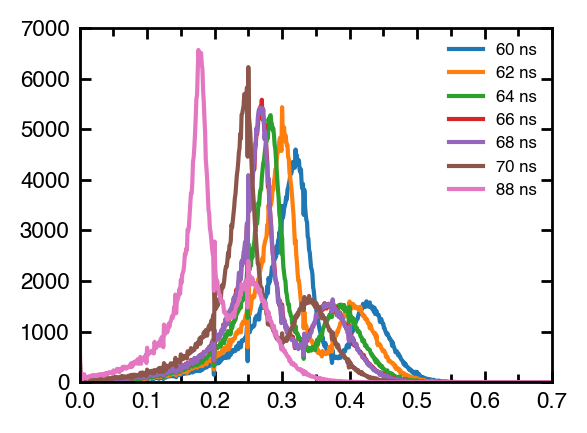

In [6]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)
xaxis=np.arange(0,1,0.001)

ax.plot(xaxis,PSD60,label = '60 ns')
ax.plot(xaxis,PSD62,label = '62 ns')
ax.plot(xaxis,PSD64,label = '64 ns')
ax.plot(xaxis,PSD66,label = '66 ns')
ax.plot(xaxis,PSD68,label = '68 ns')
ax.plot(xaxis,PSD70,label = '70 ns')
#ax.plot(xaxis,PSD74,label = '74 ns')
#ax.plot(xaxis,PSD80,label = '80 ns')
#ax.plot(xaxis,PSD84,label = '84 ns')
ax.plot(xaxis,PSD88,label = '88 ns')
#ax.plot(xaxis,PSD92,label = '92 ns')
#ax.plot(xaxis,PSD96,label = '96 ns')
fig_post_def(xlim=(0,0.7),ylim=(0,7000),xticks=(0.1,0.05))

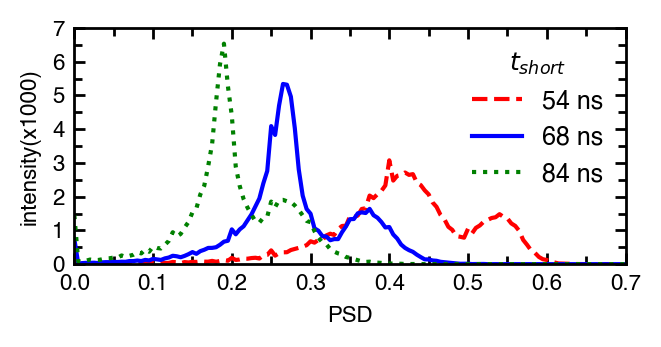

In [20]:
fig = fig_pre_def(7,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)
xaxis=np.arange(0,1,0.001)
selection = np.arange(0,1000,5)
ax.plot(xaxis[selection],PSD54[selection]/1000,'--r',label = '54 ns')
#ax.plot(xaxis,PSD62,label = '62 ns')
#ax.plot(xaxis,PSD64,label = '64 ns')
#ax.plot(xaxis[selection],PSD64[selection]/1000,'b',label = '64 ns')
ax.plot(xaxis[selection],PSD68[selection]/1000,'b',label = '68 ns')
#ax.plot(xaxis[selection],PSD70[selection]/1000,'b',label = '68 ns')
#ax.plot(xaxis,PSD74,label = '74 ns')
#ax.plot(xaxis,PSD80,label = '80 ns')
#ax.plot(xaxis,PSD84,label = '84 ns')
#ax.plot(xaxis,PSD88,label = '88 ns')
ax.plot(xaxis[selection],PSD84[selection]/1000,':g',label = '84 ns')
#ax.plot(xaxis,PSD92,label = '92 ns')
#ax.plot(xaxis,PSD96,label = '96 ns')
fig_post_def(xlim=(0,0.7),ylim=(0,7000/1000),xticks=(0.1,0.05)
             ,yticks=(1,0.5)
             ,lg_fs=9
             ,title=r'$t_{short}$'
             ,xlabel = 'PSD'
             ,ylabel = 'intensity(x1000)')

plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/PSD_comparison.svg', format="svg")


In [8]:
from scipy.optimize import curve_fit,fmin

def gauss_wo_baseline(x,  A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gaussian_fit(x,y) :  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))  
    popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma], maxfev=1000)
    return popt
    print('Fitting Finished')

A, x0, sigma:  [4.34561515e+03 3.17601086e-01 2.29756490e-02]
A, x0, sigma:  [1.48499444e+03 4.28370621e-01 3.09812979e-02]
FOM_60=  0.8717967404631619


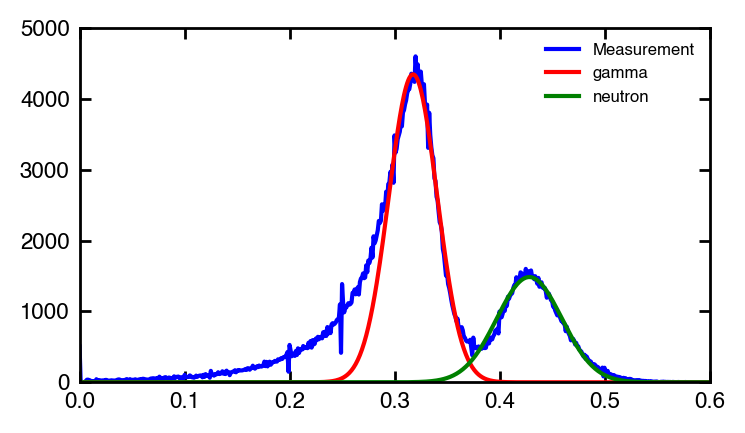

In [9]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD60,'b',label='Measurement')
ragne_60_1=np.arange(290,360,1)
ga_60_para_1 = gaussian_fit(xaxis[ragne_60_1],PSD60[ragne_60_1])
print("A, x0, sigma: ",ga_60_para_1)
ga_60_1 = gauss_wo_baseline(xaxis,ga_60_para_1[0],ga_60_para_1[1],ga_60_para_1[2])
plt.plot(xaxis,ga_60_1,'r',label='gamma')

ragne_60_2=np.arange(400,600,1)
ga_60_para_2 = gaussian_fit(xaxis[ragne_60_2],PSD60[ragne_60_2])
print("A, x0, sigma: ",ga_60_para_2)
ga_60_2 = gauss_wo_baseline(xaxis,ga_60_para_2[0],ga_60_para_2[1],ga_60_para_2[2])
plt.plot(xaxis,ga_60_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,5000))
FOM_60 = abs(ga_60_para_2[1]-ga_60_para_1[1])/((2*(2*np.log(2))**0.5)*(ga_60_para_2[2]+ga_60_para_1[2]))
print("FOM_60= ",FOM_60)

A, x0, sigma:  [4.90997081e+03 3.00365759e-01 1.88633277e-02]
A, x0, sigma:  [1.45419409e+03 4.07597694e-01 3.28581922e-02]
FOM_62=  0.880430624011604


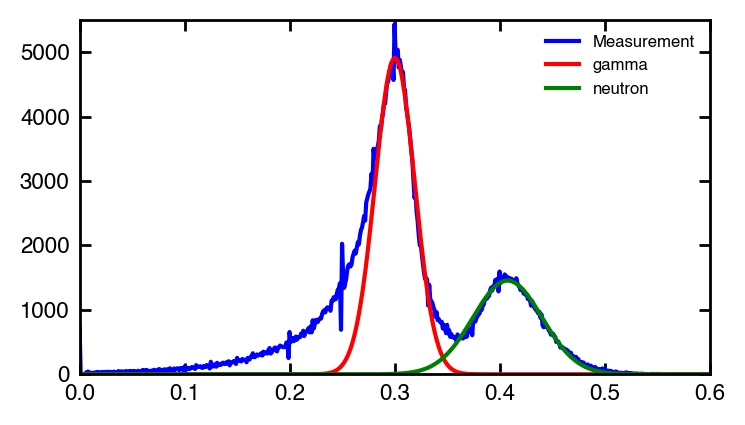

In [10]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD62,'b',label='Measurement')
ragne_62_1=np.arange(290,340,1)
ga_62_para_1 = gaussian_fit(xaxis[ragne_62_1],PSD62[ragne_62_1])
print("A, x0, sigma: ",ga_62_para_1)
ga_62_1 = gauss_wo_baseline(xaxis,ga_62_para_1[0],ga_62_para_1[1],ga_62_para_1[2])
plt.plot(xaxis,ga_62_1,'r',label='gamma')

ragne_62_2=np.arange(380,600,1)
ga_62_para_2 = gaussian_fit(xaxis[ragne_62_2],PSD62[ragne_62_2])
print("A, x0, sigma: ",ga_62_para_2)
ga_62_2 = gauss_wo_baseline(xaxis,ga_62_para_2[0],ga_62_para_2[1],ga_62_para_2[2])
plt.plot(xaxis,ga_62_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,5500))
FOM_62 = abs(ga_62_para_2[1]-ga_62_para_1[1])/((2*(2*np.log(2))**0.5)*(ga_62_para_2[2]+ga_62_para_1[2]))
print("FOM_62= ",FOM_62)

A, x0, sigma:  [5.11962760e+03 2.81751545e-01 1.63674044e-02]
A, x0, sigma:  [1.46679263e+03 3.85518789e-01 3.39162357e-02]
FOM_64=  0.8763464850631828


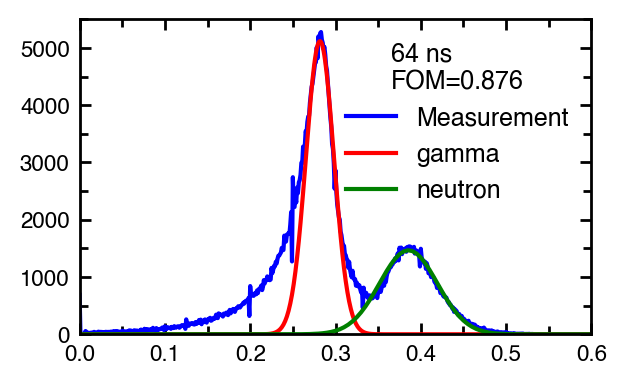

In [11]:
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD64,'b',label='Measurement')
ragne_64_1=np.arange(270,310,1)
ga_64_para_1 = gaussian_fit(xaxis[ragne_64_1],PSD64[ragne_64_1])
print("A, x0, sigma: ",ga_64_para_1)
ga_64_1 = gauss_wo_baseline(xaxis,ga_64_para_1[0],ga_64_para_1[1],ga_64_para_1[2])
plt.plot(xaxis,ga_64_1,'r',label='gamma')

ragne_64_2=np.arange(360,600,1)
ga_64_para_2 = gaussian_fit(xaxis[ragne_64_2],PSD64[ragne_64_2])
print("A, x0, sigma: ",ga_64_para_2)
ga_64_2 = gauss_wo_baseline(xaxis,ga_64_para_2[0],ga_64_para_2[1],ga_64_para_2[2])
plt.plot(xaxis[selection],ga_64_2[selection],'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,5500)
             ,xticks = (0.1,0.05),yticks=(1000,500)
             ,title='64 ns\nFOM=0.876',lg_fs=9)


FOM_64 = abs(ga_64_para_2[1]-ga_64_para_1[1])/((2*(2*np.log(2))**0.5)*(abs(ga_64_para_2[2])+abs(ga_64_para_1[2])))
print("FOM_64= ",FOM_64)



A, x0, sigma:  [5.11962760e+03 2.81751545e-01 1.63674044e-02]
A, x0, sigma:  [1.46679263e+03 3.85518789e-01 3.39162357e-02]
FOM_64=  0.8763464850631828


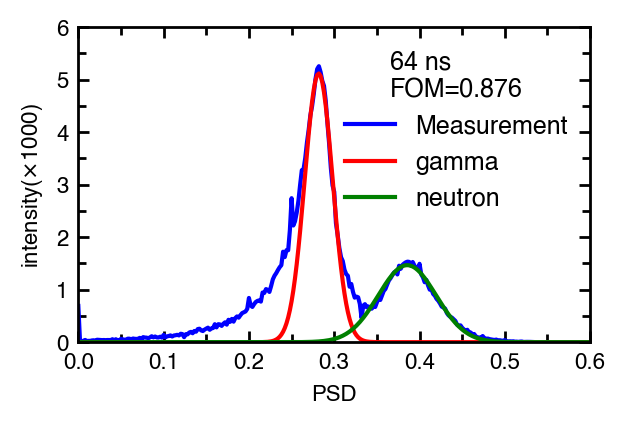

In [12]:
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

divide = 1000

selection = np.arange(0,1000,2)

plt.plot(xaxis[selection],PSD64[selection]/divide,'b',label='Measurement')



ragne_64_1=np.arange(270,310,1)
ga_64_para_1 = gaussian_fit(xaxis[ragne_64_1],PSD64[ragne_64_1])
print("A, x0, sigma: ",ga_64_para_1)
ga_64_1 = gauss_wo_baseline(xaxis,ga_64_para_1[0],ga_64_para_1[1],ga_64_para_1[2])
plt.plot(xaxis[selection],ga_64_1[selection]/divide,'r',label='gamma')

ragne_64_2=np.arange(360,600,1)
ga_64_para_2 = gaussian_fit(xaxis[ragne_64_2],PSD64[ragne_64_2])
print("A, x0, sigma: ",ga_64_para_2)
ga_64_2 = gauss_wo_baseline(xaxis,ga_64_para_2[0],ga_64_para_2[1],ga_64_para_2[2])

plt.plot(xaxis[selection],ga_64_2[selection]/divide,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,6000/divide)
             ,xticks = (0.1,0.05),yticks=(1000/divide,500/divide)
             ,title='64 ns\nFOM=0.876',lg_fs=9,
             xlabel = 'PSD',ylabel=r'intensity($\times$1000)')


FOM_64 = abs(ga_64_para_2[1]-ga_64_para_1[1])/((2*(2*np.log(2))**0.5)*(abs(ga_64_para_2[2])+abs(ga_64_para_1[2])))
print("FOM_64= ",FOM_64)

plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/PSD_64ns.svg', format="svg")


A, x0, sigma:  [5.38579985e+03 2.68496552e-01 1.45919622e-02]
A, x0, sigma:  [1.47989283e+03 3.70395292e-01 3.36837342e-02]
FOM_66=  0.8963601623969701


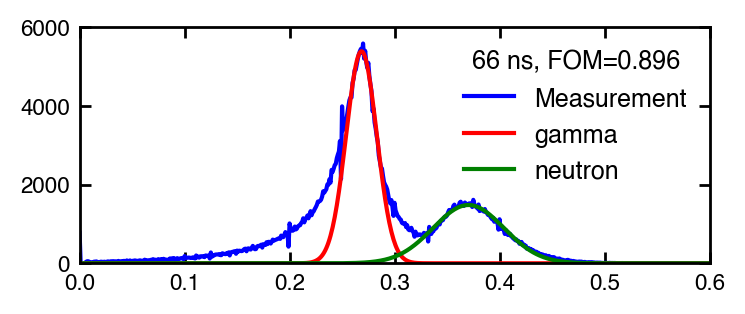

In [13]:
fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD66,'b',label='Measurement')
ragne_66_1=np.arange(260,290,1)
ga_66_para_1 = gaussian_fit(xaxis[ragne_66_1],PSD66[ragne_66_1])
print("A, x0, sigma: ",ga_66_para_1)
ga_66_1 = gauss_wo_baseline(xaxis,ga_66_para_1[0],ga_66_para_1[1],ga_66_para_1[2])
plt.plot(xaxis,ga_66_1,'r',label='gamma')

ragne_66_2=np.arange(330,600,1)
ga_66_para_2 = gaussian_fit(xaxis[ragne_66_2],PSD66[ragne_66_2])
print("A, x0, sigma: ",ga_66_para_2)
ga_66_2 = gauss_wo_baseline(xaxis,ga_66_para_2[0],ga_66_para_2[1],ga_66_para_2[2])
plt.plot(xaxis,ga_66_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,6000),title='66 ns, FOM=0.896',lg_fs=9)
FOM_66 = abs(ga_66_para_2[1]-ga_66_para_1[1])/((2*(2*np.log(2))**0.5)*(abs(ga_66_para_2[2])+abs(ga_66_para_1[2])))
print("FOM_66= ",FOM_66)

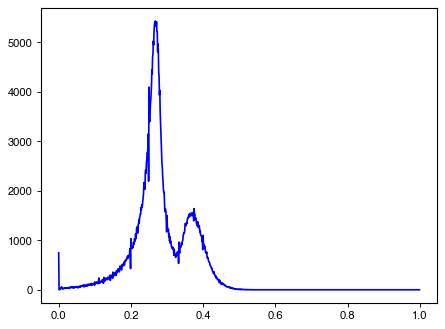

In [14]:
plt.plot(xaxis,PSD68,'b',label='Measurement')

A, x0, sigma:  [5.32775787e+03 2.67150294e-01 1.61878708e-02]
A, x0, sigma:  [1.48809150e+03 3.70182187e-01 3.32958105e-02]
FOM_68=  0.8842029426386874


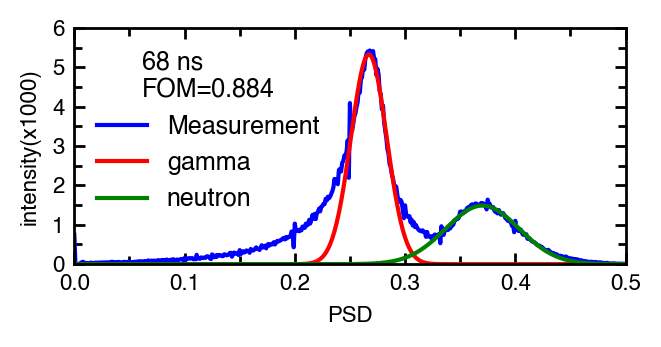

In [18]:
fig = fig_pre_def(7,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

divide = 1000

plt.plot(xaxis,PSD68/divide,'b',label='Measurement')
ragne_68_1=np.arange(250,290,1)
ga_68_para_1 = gaussian_fit(xaxis[ragne_68_1],PSD68[ragne_68_1])
print("A, x0, sigma: ",ga_68_para_1)
ga_68_1 = gauss_wo_baseline(xaxis,ga_68_para_1[0],ga_68_para_1[1],ga_68_para_1[2])
plt.plot(xaxis,ga_68_1/divide,'r',label='gamma')

ragne_68_2=np.arange(330,600,1)
ga_68_para_2 = gaussian_fit(xaxis[ragne_68_2],PSD68[ragne_68_2])
print("A, x0, sigma: ",ga_68_para_2)
ga_68_2 = gauss_wo_baseline(xaxis,ga_68_para_2[0],ga_68_para_2[1],ga_68_para_2[2])
plt.plot(xaxis,ga_68_2/divide,'g',label='neutron')

fig_post_def(xlim=(0,0.5),ylim=(0,6000/divide)
             ,xticks = (0.1,0.05),yticks=(1000/divide,500/divide)
            ,xlabel = 'PSD',ylabel=r'intensity(x1000)'
             ,title='68 ns\nFOM=0.884',lg_fs = 9)

FOM_68 = abs(ga_68_para_2[1]-ga_68_para_1[1])/((2*(2*np.log(2))**0.5)*(abs(ga_68_para_2[2])+abs(ga_68_para_1[2])))
print("FOM_68= ",FOM_68)

plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/PSD_68ns.svg', format="svg")

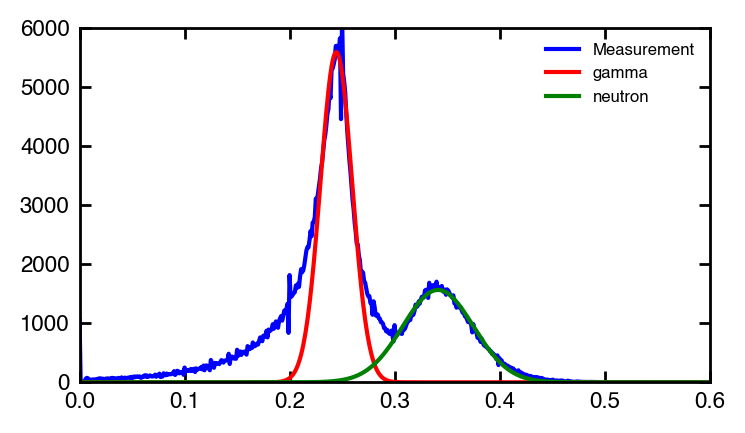

In [28]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD70,'b',label='Measurement')
ragne_70_1=np.arange(240,270,1)
ga_70_para_1 = gaussian_fit(xaxis[ragne_70_1],PSD70[ragne_70_1])
ga_70_1 = gauss_wo_baseline(xaxis,ga_70_para_1[0],ga_70_para_1[1],ga_70_para_1[2])
plt.plot(xaxis,ga_70_1,'r',label='gamma')

ragne_70_2=np.arange(300,600,1)
ga_70_para_2 = gaussian_fit(xaxis[ragne_70_2],PSD70[ragne_70_2])
ga_70_2 = gauss_wo_baseline(xaxis,ga_70_para_2[0],ga_70_para_2[1],ga_70_para_2[2])
plt.plot(xaxis,ga_70_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,6000))

# test

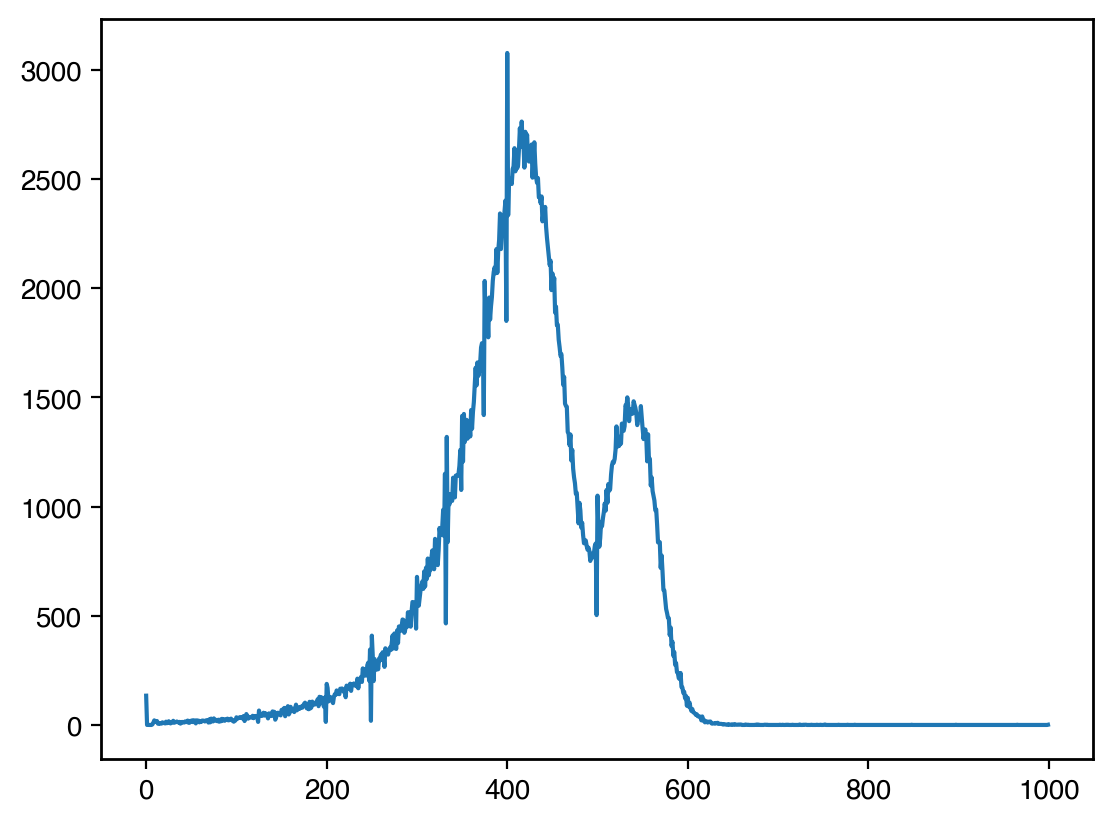

In [88]:
PSD60 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221021_TH3535_ch0_3inches_54ns_HV1550_d30cm_Ch2_2inches_54ns_30cm_HV800.txt')
plt.plot(PSD60)

A, x0, sigma:  [2.46343160e+03 4.11527818e-01 5.67279814e-02]
A, x0, sigma:  [1.48264352e+03 5.35528797e-01 2.96753496e-02]
FOM_60=  0.6094483490641578


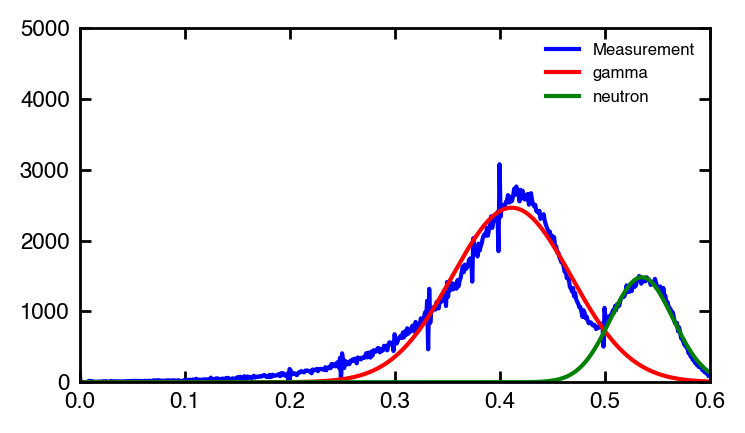

In [90]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD60,'b',label='Measurement')
ragne_60_1=np.arange(250,500,1)
ga_60_para_1 = gaussian_fit(xaxis[ragne_60_1],PSD60[ragne_60_1])
print("A, x0, sigma: ",ga_60_para_1)
ga_60_1 = gauss_wo_baseline(xaxis,ga_60_para_1[0],ga_60_para_1[1],ga_60_para_1[2])
plt.plot(xaxis,ga_60_1,'r',label='gamma')

ragne_60_2=np.arange(500,700,1)
ga_60_para_2 = gaussian_fit(xaxis[ragne_60_2],PSD60[ragne_60_2])
print("A, x0, sigma: ",ga_60_para_2)
ga_60_2 = gauss_wo_baseline(xaxis,ga_60_para_2[0],ga_60_para_2[1],ga_60_para_2[2])
plt.plot(xaxis,ga_60_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,5000))
FOM_60 = abs(ga_60_para_2[1]-ga_60_para_1[1])/((2*(2*np.log(2))**0.5)*(ga_60_para_2[2]+ga_60_para_1[2]))
print("FOM_60= ",FOM_60)

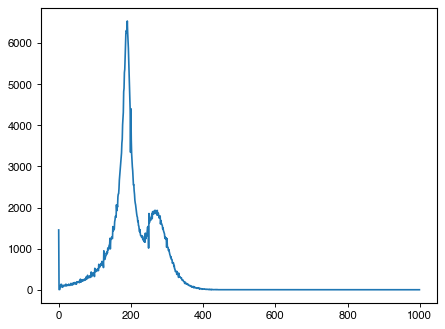

In [91]:
PSD60 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_84ns_HV1550_d30cm_Ch2_2inches_84ns_30cm_HV800.txt')
plt.plot(PSD60)

A, x0, sigma:  [5.50891981e+03 1.87713121e-01 1.75128239e-02]
A, x0, sigma:  [1.94967893e+03 2.59062921e-01 3.93860714e-02]
FOM_60=  0.532514210395713


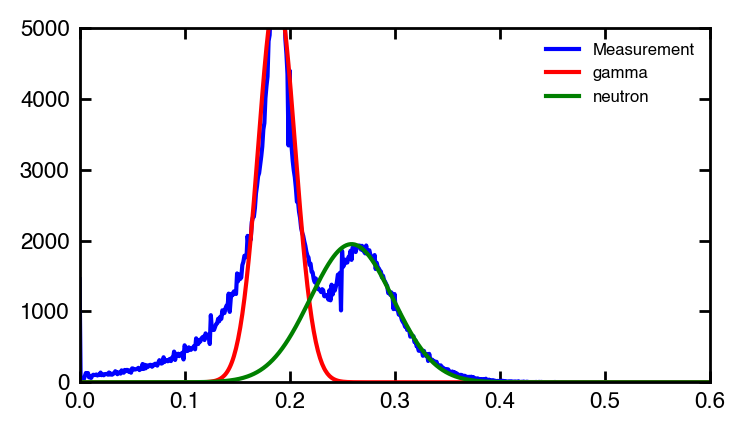

In [96]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD60,'b',label='Measurement')
ragne_60_1=np.arange(150,220,1)
ga_60_para_1 = gaussian_fit(xaxis[ragne_60_1],PSD60[ragne_60_1])
print("A, x0, sigma: ",ga_60_para_1)
ga_60_1 = gauss_wo_baseline(xaxis,ga_60_para_1[0],ga_60_para_1[1],ga_60_para_1[2])
plt.plot(xaxis,ga_60_1,'r',label='gamma')

ragne_60_2=np.arange(260,500,1)
ga_60_para_2 = gaussian_fit(xaxis[ragne_60_2],PSD60[ragne_60_2])
print("A, x0, sigma: ",ga_60_para_2)
ga_60_2 = gauss_wo_baseline(xaxis,ga_60_para_2[0],ga_60_para_2[1],ga_60_para_2[2])
plt.plot(xaxis,ga_60_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,5000))
FOM_60 = abs(ga_60_para_2[1]-ga_60_para_1[1])/((2*(2*np.log(2))**0.5)*(ga_60_para_2[2]+ga_60_para_1[2]))
print("FOM_60= ",FOM_60)